In [ ]:
import random
import time
from tqdm import tqdm_notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt
import sys

In [ ]:
class Node: # Represents an individual node in the doubly linked list
    def __init__(self, val=None):
        self.val = val
        self.next = None
        self.prev = None

    def __repr__(self):
        return str(self.val)

In [ ]:
class DLinkList: # doubly linked list class
    def __init__(self):
        self.head = None
        self.tail = None
        self.size = 0

    def append(self, val): # adds an element at the end of a linked list

        newnode = Node(val)

        if self.head is None and self.tail is None: #0 elements
            self.head = newnode
            self.tail = newnode
            self.size += 1
        else:
            self.tail.next = newnode
            newnode.prev = self.tail
            self.tail = newnode
            self.size += 1

    def delete(self, position: int): # deletes the element in a particular position in linked list

        if self.head == None:
            print('Linked list is empty, cannot delete the element')
        else:
            cur_pos = 1
            node = self.head
            if position == 1:
                newhead = node.next
                self.head = newhead
                del node
                self.size -= 1
                return
            while node != None:
                if cur_pos == position: # tail, tail.prev = a, tail.next = None
                    if node == self.tail:
                        back = node.prev
                        self.tail = back
                        del back
                        self.size -= 1
                        break
                    else:
                        back,front = node.prev,node.next# back = a, front = None
                        back.next = front # back.next = None
                        front.prev = back # None.next -> error
                        del node
                        self.size -= 1
                        break
                node = node.next
                cur_pos += 1

    def sort(self, asc = True): # Sorts linked list in increasing or decreasing order based on asc parameter

      check = lambda x,y: x>y if asc else x<y
      for i in range(0,self.size):
        temp = self.head
        swap = False
        for j in range(0,self.size-i-1):
          if check(temp.val,temp.next.val):
            temp.next.val, temp.val = temp.val, temp.next.val
            swap = True

          temp = temp.next

        if not swap:
          break


    def countgt(self, num): # counts no of elements greater than num in linked list
      count = 0
      cur = self.head

      while cur != None:
        if cur.val>num:
          count += 1
        cur = cur.next

      return count


    def insertsorted(self, num, asc=True): # insertion of element in sorted linked list
      check = lambda x,y: x<y if asc else x>y
      newnode = Node(num)

      if check(newnode.val,self.head.val):
        newnode.next = self.head
        self.head.prev = newnode
        self.head = newnode
        return

      cur = self.head
      while cur != None:
        if  check(newnode.val,cur.val):
          prev = cur.prev
          prev.next,newnode.prev,newnode.next,cur.prev = (newnode, prev, cur, newnode)
          break
        cur = cur.next
      else:
        self.tail.next = newnode
        newnode.prev = self.tail
        self.tail = newnode

    def __repr__(self):

        output = '' # 1 -> 2 -> 3 -> 4
        temp = self.head

        while temp != self.tail:
          output += str(temp.val) + ' -> '
          temp = temp.next

        output += str(temp.val)

        return output


In [ ]:
def sort(array, n, asc = True): # sorts the array in ascending or descending order based on asc parameter
  check = lambda x,y: x>y if asc else x<y
  for i in range(0,n):
    swap = False
    for j in range(0,n-i-1):
      if check(array[i],array[j]):
        array[i],array[j] = array[j],array[i]
        swap = True
    if not swap: break

def delete(arr, n, position): # Deletes an element in an array based on position
  arr[position-1] = None
  for i in range(position-1,n-1):
    arr[i],arr[i+1] = arr[i+1],arr[i]
  pass

def insertsorted(arr, n, num, asc = True): # Inserts an element in a sorted array
  check = lambda x,y: x<y if asc else x>y
  temp = None
  for i in range(n):
    if check(num,arr[i]):
      temp = arr[i]
      arr[i] = num
      for j in range(i+1,n):
        arr[j],temp = temp, arr[j]
      break

In [ ]:
linklist = DLinkList()
linklist.append(1)
linklist.append(2)
linklist.append(35)
linklist.append(3)
linklist.append(4)
print(linklist)
linklist.delete(3)
print(linklist)
linklist.delete(1)
print(linklist)
linklist.delete(3)
print(linklist)
linklist.insertsorted(1)
print(linklist)
linklist.insertsorted(4)
print(linklist)
linklist.insertsorted(2.5)
print(linklist)
linklist.insertsorted(6,asc=False)
print(linklist)
linklist.insertsorted(0,asc=False)
print(linklist)

1 -> 2 -> 35 -> 3 -> 4
1 -> 2 -> 3 -> 4
2 -> 3 -> 4
2 -> 3
1 -> 2 -> 3
1 -> 2 -> 3 -> 4
1 -> 2 -> 2.5 -> 3 -> 4
6 -> 1 -> 2 -> 2.5 -> 3 -> 4
6 -> 1 -> 2 -> 2.5 -> 3 -> 4 -> 0


# Testing the code for linked list

In [ ]:
n = int(input('Enter no.of elements in the linked list: '))
m = int(input('Enter the upper range of elements: '))
linkedlist = DLinkList()
arr = []
for i in range(n):
  num = random.randint(1,m+1) # randint(a,b) gives a random number between a and b where b is exclusive
  linkedlist.append(num)
  arr.append(num)

print("original linkedlist: ",linkedlist)
count = linkedlist.countgt(50)
sort_order = count>5
linkedlist.sort(asc = sort_order)
print("sorted linkedlist: ", linkedlist)
position = 5 if sort_order else 2
linkedlist.delete(position)
linkedlist.insertsorted(10,sort_order)
print("Linkedlist after changes: ", linkedlist)

Enter no.of elements in the linked list: 7
Enter the upper range of elements: 108
original linkedlist:  78 -> 54 -> 45 -> 64 -> 45 -> 100 -> 43
sorted linkedlist:  100 -> 78 -> 64 -> 54 -> 45 -> 45 -> 43
Linkedlist after changes:  100 -> 64 -> 54 -> 45 -> 45 -> 43 -> 10


# Testing the Code for Array

In [ ]:
count = 0
print(arr)
for i in arr:
  if i>50: count += 1
sort_order = count > 5
sort(arr, n, asc = sort_order)
print("sorted array: ", arr)
position = 5 if sort_order else 2
delete(arr, n, position)
print('array after deletion: ', arr)
insertsorted(arr, n, 10)
print('array after insertion: ', arr)

[78, 54, 45, 64, 45, 100, 43]
sorted array:  [45, 45, 64, 100, 54, 78, 43]
array after deletion:  [45, 64, 100, 54, 78, 43, None]
array after insertion:  [10, 45, 64, 100, 54, 78, 43]


In [ ]:
  # scratch code
flag = True
a = lambda x,y: x<y if flag else x>y
print(a(1,2))
flag = False
print(a(6,5))

True
True


# Time Complexity and Space Complexity

In [ ]:
def theoritical_time_and_space_complexity():
  print('Time Complexity for Sorting and deletions and insertion of an element in Linked List and Array - O(n^2)')
  print('Space Complexity for Sorting and deletions and insertion of an element in Linked List and Array - O(n)')

In [ ]:
def calculate_time_and_space(n,m,r):
  # for linked list
  avg_time = 0
  avg_space = 0
  for i in range(r):
    start_time = time.time()
    llist = DLinkList()
    for j in range(n):
      num = random.randint(1,m+1)
      llist.append(num)

    count = llist.countgt(50)
    sort_order = count>5
    llist.sort(asc = sort_order)
    position = 5 if sort_order else 2
    llist.delete(position)
    llist.insertsorted(10,sort_order)
    end_time = time.time()
    avg_time += (end_time-start_time)/r
    avg_space += sys.getsizeof(llist)/r

  print(f'Avg Time taken for Linked List Operations of size {n} - {avg_time} secs')
  print(f'Avg space taken for Linked List Operations of size {n} - {avg_space} bytes')

  #for array
  avg_time = 0
  avg_space = 0
  for i in range(r):
    start_time = time.time()
    arr = []
    for j in range(n):
      num = random.randint(1,m+1)
      arr.append(num)

    for i in arr:
      if i>50: count += 1

    sort_order = count > 5
    sort(arr, n, asc = sort_order)
    position = 5 if sort_order else 2
    delete(arr, n, position)
    insertsorted(arr, n, 10)
    end_time = time.time()
    avg_time += (end_time-start_time)/r
    avg_space += sys.getsizeof(arr)/r

  print(f'Avg Time taken for Array Operations of size {n} - {avg_time} secs')
  print(f'Avg space taken for Aray Operations of size {n} - {avg_space} bytes')

In [ ]:
theoritical_time_and_space_complexity()

Time Complexity for Sorting and deletions and insertion of an element in Linked List and Array - O(n^2)
Space Complexity for Sorting and deletions and insertion of an element in Linked List and Array - O(n)


In [ ]:
n = int(input('Enter no.of elements in the linked list: '))
m = int(input('Enter the upper range of elements: '))
r = int(input('Enter the no of times the operations has to be done for avg calculation: '))
calculate_time_and_space(n,m,r)

Enter no.of elements in the linked list: 50
Enter the upper range of elements: 108
Enter the no of times the operations has to be done for avg calculation: 5
Avg Time taken for Linked List Operations of size 50 - 0.0006421089172363281 secs
Avg space taken for Linked List Operations of size 50 - 48.0 bytes
Avg Time taken for Array Operations of size 50 - 0.0006130218505859375 secs
Avg space taken for Aray Operations of size 50 - 472.0 bytes


# To plot the graph between the size of linked list vs avg time taken to perform operations

In [ ]:
 def caltime(m,r):
  avg_times = []
  n = range(10,10000,50)
  for i in tqdm(n):
    avg_time = 0
    for j in range(r):
      start_time = time.time()
      linkedlist = DLinkList()
      for k in range(i):
        num = random.randint(1,m+1) # randint(a,b) gives a random number between a and b where b is exclusive
        linkedlist.append(num)

      count = linkedlist.countgt(50)
      sort_order = count>5
      linkedlist.sort(asc = sort_order)
      position = 5 if sort_order else 2
      linkedlist.delete(position)
      linkedlist.insertsorted(10,sort_order)
      if i<=100: print("Final linked list: ", linkedlist)
      end_time = time.time()
      avg_time += (end_time-start_time)/r

    avg_times.append(avg_time)

  plt.plot(n,avg_times)
  plt.xlabel("Size of Linked List")
  plt.ylabel("Avg time to perform operations")
  plt.xscale("log")
  return list(zip(n,avg_times))

<ipython-input-22-91234c08f8b4>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(n):


  0%|          | 0/200 [00:00<?, ?it/s]

Final linked list:  7 -> 10 -> 13 -> 37 -> 68 -> 80 -> 87 -> 89 -> 91 -> 93
Final linked list:  10 -> 24 -> 27 -> 35 -> 37 -> 64 -> 71 -> 77 -> 80 -> 107
Final linked list:  10 -> 25 -> 27 -> 27 -> 61 -> 82 -> 97 -> 103 -> 103 -> 107
Final linked list:  95 -> 74 -> 58 -> 48 -> 44 -> 39 -> 33 -> 26 -> 26 -> 10
Final linked list:  10 -> 24 -> 33 -> 39 -> 52 -> 80 -> 82 -> 89 -> 96 -> 101
Final linked list:  3 -> 4 -> 9 -> 10 -> 11 -> 15 -> 19 -> 25 -> 29 -> 30 -> 31 -> 32 -> 33 -> 33 -> 34 -> 34 -> 34 -> 35 -> 37 -> 38 -> 39 -> 43 -> 45 -> 45 -> 48 -> 50 -> 50 -> 51 -> 53 -> 53 -> 53 -> 63 -> 64 -> 68 -> 73 -> 74 -> 75 -> 75 -> 78 -> 80 -> 81 -> 81 -> 85 -> 85 -> 88 -> 91 -> 92 -> 93 -> 94 -> 94 -> 96 -> 97 -> 98 -> 99 -> 100 -> 101 -> 105 -> 108 -> 108 -> 109
Final linked list:  3 -> 3 -> 7 -> 10 -> 10 -> 12 -> 13 -> 16 -> 19 -> 19 -> 20 -> 26 -> 27 -> 30 -> 32 -> 36 -> 39 -> 39 -> 39 -> 40 -> 40 -> 42 -> 43 -> 45 -> 45 -> 48 -> 48 -> 50 -> 50 -> 50 -> 56 -> 57 -> 60 -> 65 -> 67 -> 69 -

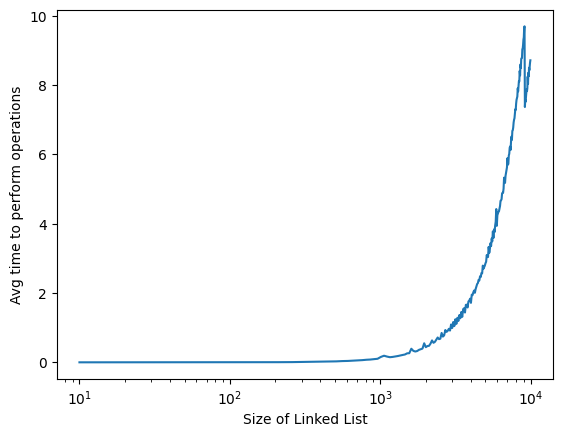

In [ ]:
vals = caltime(108,5)